In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

from da_toolbox.utils import NeuralNetwork, CustomDataset
from da_toolbox.deepda import DeepCORAL, DeepJDOT, BaseDANetwork
%matplotlib inline


/storage/store3/work/tgnassou/miniconda3/envs/msda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Create shift dataset

In [23]:
n_classes = 2
n_features = 2
np.random.seed(0)
centers = np.random.random((n_classes, n_features))
X, y = make_blobs(n_samples=500, centers=centers, n_features=n_features,
                  random_state=0, cluster_std=0.05)

In [24]:
X_target, y_target = make_blobs(n_samples=200, centers=centers, n_features=n_features,
                  random_state=1, cluster_std=0.05)

In [25]:
X_target[:, 0] += 0.05
X_target[:, 1] += 0.15

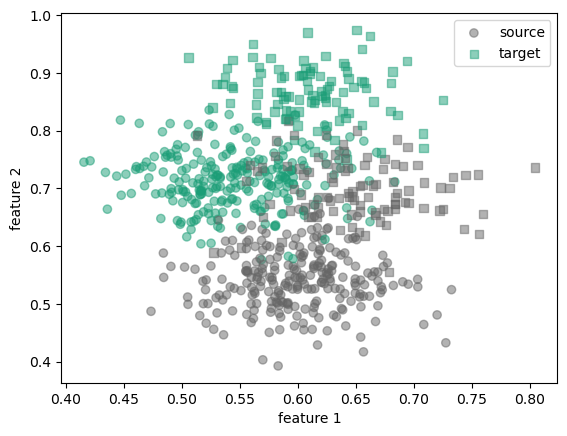

In [26]:

plt.scatter(
    X[:,0], X[:,1], c=y, marker="o", alpha=0.5, cmap="Dark2", label="source"
)
plt.scatter(
    X_target[:,0], X_target[:,1], marker="s", c=y_target+1, cmap="Dark2", alpha=0.5, label="target"
)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()

In [27]:
model = NeuralNetwork(n_features, n_classes)
dataset = CustomDataset(X.astype(np.float32), y)
dataset_target = CustomDataset(X_target.astype(np.float32), y_target)

## Classic training

In [28]:
method_classique = DeepCORAL(model, layer_names=["feature_extractor"])
method_classique.fit(dataset=dataset, dataset_target=None)


In [29]:
y_pred = method_classique.predict(dataset_target)
accuracy_score(y_pred, y_target)


0.715

In [30]:
model_pre_train = method_classique.best_model()

## DeepJDOT method

In [31]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
        "balanced", classes=np.unique(y), y=y
    )

In [32]:
method_deepjdot = DeepJDOT(
    model_pre_train, 
    layer_names=["feature_extractor"], 
    n_classes=n_classes, 
    alpha=1, 
    beta=1, 
    class_weights=class_weights
)
method_deepjdot.fit(dataset=dataset, dataset_target=dataset_target)


In [33]:
y_pred = method_deepjdot.predict(dataset_target)
accuracy_score(y_pred, y_target)


0.855

## DeepCoral method

In [34]:
method_deepcoral = DeepCORAL(model, layer_names=["feature_extractor"], alpha=10)
method_deepcoral.fit(dataset=dataset, dataset_target=dataset_target)


In [35]:
y_pred = method_deepcoral.predict(dataset_target)
accuracy_score(y_pred, y_target)


0.72